## Melville Bay map

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
# from matplotlib.gridspec import GridSpec
import pandas as pd
from pathlib import Path
import xarray as xr
import cmocean
import cartopy
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

Load data

In [2]:
## load bathymetry data from GEBCO
bathy_ds = xr.open_dataset('data/GEBCO/gebco_2021_n90.0_s30.0_w-120.0_e30.0.nc')

In [3]:
## subset bathymetry to reduce dataset size
bathy_select = bathy_ds.elevation.isel(lat=slice(0,None,1), lon=slice(0,None,1)).sel(lat=slice(71.5,77.5), lon=slice(-72,-52.5))
bathy_select_all = bathy_ds.elevation.isel(lat=slice(0,None,15), lon=slice(0,None,15)).sel(lat=slice(50,90), lon=slice(-130,30))

version 1

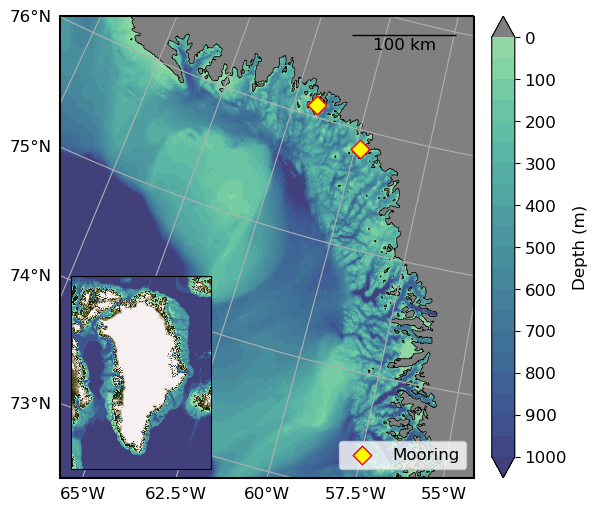

In [7]:
fig = plt.figure(figsize=(7,5), constrained_layout=True)
plt.rcParams['font.size'] = '12'
ax1 = plt.subplot(111, projection=ccrs.NorthPolarStereo(central_longitude = -45)) # nrows, ncols, index

ax1.set_extent([-66.6, -56.3, 73.2, 76.5], ccrs.PlateCarree()) # Melville Bay extent

## Plot Melville Bay map ----------------------------------------------
# define top and bottom colormaps 
bathy = cm.get_cmap(cmocean.cm.deep_r, 21) # original option
surface = (.5, .5, .5, 1.0)
newcolors = np.vstack((bathy(np.linspace(0.2, 0.8, 21)),
                       surface)) # create a new colormaps
ocean_land = ListedColormap(newcolors, name='ocean_land')
bounds = [-1000,-950,-900,-850,-800,-750,-700,-650,-600,-550,-500,-450,-400,-350,-300,-250,-200,-150,-100,-50,0]
ticks = [-1000,-900,-800,-700,-600,-500,-400,-300,-200,-100,0]
tick_labels = [1000,900,800,700,600,500,400,300,200,100,0]
pc = bathy_select.plot.pcolormesh('lon','lat',ax=ax1,transform=ccrs.PlateCarree(),shading='auto',rasterized=True,cmap=ocean_land,levels=bounds,add_colorbar=False)
# cbar = plt.colorbar(pc, label='Elevation (m)',ticks=ticks,boundaries=bounds,orientation='horizontal',shrink=0.7,spacing='uniform',pad=0.005,aspect=30)
cbar = plt.colorbar(pc, ax=ax1, label='Depth (m)',ticks=ticks,boundaries=bounds,orientation='vertical',fraction=0.046,spacing='uniform',pad=0.03)
cbar.ax.set_yticklabels(tick_labels)
# add coastline
bathy_select.plot.contour('lon','lat', levels=[0], ax=ax1,transform=ccrs.PlateCarree(),colors='k',linewidths=0.5)

# ax.coastlines(linewidths=0.7)
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,x_inline=False, y_inline=False,\
                  xpadding=6,ypadding=6,rotate_labels=False)
gl.top_labels = False
gl.right_labels = False
# gl.xlabel_style = {'rotation': 0}
# gl.ylabel_style = {'rotation': 0}

# add markers for mooring loccations
ax1.scatter(-59.8431, 75.8418,   s=90, c='yellow',edgecolor='red',marker="D",transform=ccrs.PlateCarree(),zorder=5,label='Mooring') # kong oscar
ax1.scatter(-61.726983, 76.103817, s=90, c='yellow',edgecolor='red',marker="D",transform=ccrs.PlateCarree(),zorder=5) # fisher islands

# thicken map border
ax1.spines['geo'].set_linewidth(1.5)
ax1.spines['geo'].set_edgecolor('k')

# add inset map ---------------------------------------------------------
# define top and bottom colormaps 
bottom = cm.get_cmap(cmocean.cm.deep_r, 8)
top = cm.get_cmap(cmocean.cm.diff_r, 12)
newcolors = np.vstack((bottom(np.linspace(0.2, 0.8, 8)),
                       top(np.linspace(0, 0.5, 12))))
ocean_land = ListedColormap(newcolors, name='ocean_land')
bounds = [-1000,-500,-400,-300,-200,-100,0,100,200,300,400,500,600,700,800,900,1000]

axins = inset_axes(ax1, width="35%", height="42%", loc="lower left", 
                   axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(map_projection=ccrs.NorthPolarStereo(central_longitude = -45)))
axins.set_extent([-62, -25, 57, 86], ccrs.PlateCarree())
bathy_select_all.plot.pcolormesh('lon','lat',ax=axins,transform=ccrs.PlateCarree(),shading='auto',
                                 rasterized=True,cmap=ocean_land,levels=bounds,add_colorbar=False);

# add manual legend
ax1.legend(loc='lower right');

# add scale bar
fontprops = fm.FontProperties(size=12)
scalebar = AnchoredSizeBar(ax1.transData,1e5,'100 km','upper right',pad=1,color='black',frameon=False,size_vertical=4,fontproperties=fontprops)
ax1.add_artist(scalebar);

plt.savefig("figures/map_melvillebay_manuscript.png", bbox_inches='tight', dpi=300, facecolor='white')

version 2

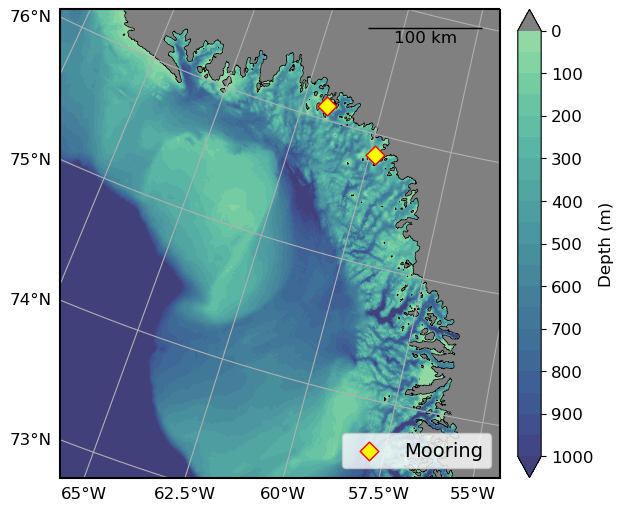

In [13]:
fig = plt.figure(figsize=(7,5), constrained_layout=True)
plt.rcParams['font.size'] = '12'
ax1 = plt.subplot(111, projection=ccrs.NorthPolarStereo(central_longitude = -45)) # nrows, ncols, index

ax1.set_extent([-66.6, -56.3, 73.5, 76.5], ccrs.PlateCarree()) # Melville Bay extent

## Plot Melville Bay map ----------------------------------------------
# define top and bottom colormaps 
bathy = cm.get_cmap(cmocean.cm.deep_r, 21) # original option
surface = (.5, .5, .5, 1.0)
newcolors = np.vstack((bathy(np.linspace(0.2, 0.8, 21)),
                       surface)) # create a new colormaps
ocean_land = ListedColormap(newcolors, name='ocean_land')
bounds = [-1000,-950,-900,-850,-800,-750,-700,-650,-600,-550,-500,-450,-400,-350,-300,-250,-200,-150,-100,-50,0]
ticks = [-1000,-900,-800,-700,-600,-500,-400,-300,-200,-100,0]
tick_labels = [1000,900,800,700,600,500,400,300,200,100,0]
pc = bathy_select.plot.pcolormesh('lon','lat',ax=ax1,transform=ccrs.PlateCarree(),shading='auto',rasterized=True,cmap=ocean_land,levels=bounds,add_colorbar=False)
# cbar = plt.colorbar(pc, label='Elevation (m)',ticks=ticks,boundaries=bounds,orientation='horizontal',shrink=0.7,spacing='uniform',pad=0.005,aspect=30)
cbar = plt.colorbar(pc, ax=ax1, label='Depth (m)',ticks=ticks,boundaries=bounds,orientation='vertical',fraction=0.046,spacing='uniform',pad=0.03)
cbar.ax.set_yticklabels(tick_labels)
# add coastline
bathy_select.plot.contour('lon','lat', levels=[0], ax=ax1,transform=ccrs.PlateCarree(),colors='k',linewidths=0.5)

# ax.coastlines(linewidths=0.7)
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,x_inline=False, y_inline=False,\
                  xpadding=6,ypadding=6,rotate_labels=False)
gl.top_labels = False
gl.right_labels = False
# gl.xlabel_style = {'rotation': 0}
# gl.ylabel_style = {'rotation': 0}

# add markers for mooring loccations
ax1.scatter(-59.8431, 75.8418,   s=90, c='yellow',edgecolor='red',marker="D",transform=ccrs.PlateCarree(),zorder=5,label='Mooring') # kong oscar
ax1.scatter(-61.726983, 76.103817, s=90, c='yellow',edgecolor='red',marker="D",transform=ccrs.PlateCarree(),zorder=5) # fisher islands

# thicken map border
ax1.spines['geo'].set_linewidth(1.5)
ax1.spines['geo'].set_edgecolor('k')

# add manual legend
ax1.legend(loc='lower right',fontsize=14);

# add scale bar
fontprops = fm.FontProperties(size=12)
scalebar = AnchoredSizeBar(ax1.transData,1e5,'100 km','upper right',pad=1,color='black',frameon=False,size_vertical=4,fontproperties=fontprops)
ax1.add_artist(scalebar);

plt.savefig("figures/map_melvillebay_manuscript.png", bbox_inches='tight', dpi=300, facecolor='white')

In [4]:
## subset bathymetry with higher res than above
bathy_select_all = bathy_ds.elevation.isel(lat=slice(0,None,5), lon=slice(0,None,5)).sel(lat=slice(50,90), lon=slice(-130,30))

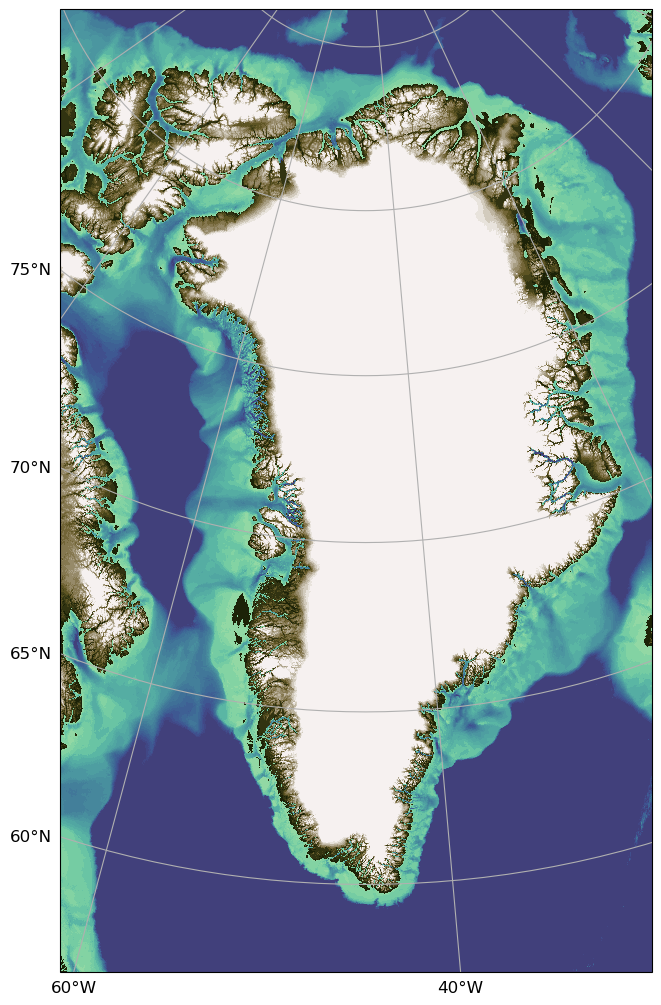

In [7]:
fig = plt.figure(figsize=(6.5,10), constrained_layout=True)
plt.rcParams['font.size'] = '12'
ax1 = plt.subplot(111, projection=ccrs.NorthPolarStereo(central_longitude = -45)) # nrows, ncols, index

ax1.set_extent([-61, -30, 57, 86], ccrs.PlateCarree()) # Melville Bay extent

# define top and bottom colormaps 
bottom = cm.get_cmap(cmocean.cm.deep_r, 21)
top = cm.get_cmap(cmocean.cm.diff_r, 12)
newcolors = np.vstack((bottom(np.linspace(0.2, 0.8, 21)),
                       top(np.linspace(0, 0.5, 12))))
ocean_land = ListedColormap(newcolors, name='ocean_land')
bounds = [-1000,-950,-900,-850,-800,-750,-700,-650,-600,-550,-500,-450,-400,\
          -350,-300,-250,-200,-150,-100,-50,0,100,200,300,400,500,600,700,800,900,1000]

bathy_select_all.plot.pcolormesh('lon','lat',ax=ax1,transform=ccrs.PlateCarree(),shading='auto',
                                 rasterized=True,cmap=ocean_land,levels=bounds,add_colorbar=False);

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,x_inline=False, y_inline=False,\
                  xpadding=6,ypadding=6,rotate_labels=False)
gl.top_labels = False
gl.right_labels = False

plt.savefig("figures/map_melvillebay_greenland_manuscript.png", bbox_inches='tight', dpi=300, facecolor='white')